In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import polyprox

In [10]:
G = np.array([[0, 0], [0.9, 0], [1.1, 1.3], [2.5, 1.0], [2.2, 2.4]])
polyprox.min_e(G, m=2)

array([[0. , 0. ],
       [1.1, 1.3],
       [2.5, 1. ],
       [2.2, 2.4]])

In [12]:
polyprox.min_num(G, epsilon=3)

array([[0. , 0. ],
       [2.2, 2.4]])

In [17]:
import rdp
import time
import matplotlib.pyplot as plt

Same result as rdp: True
Speedup: 99.96%


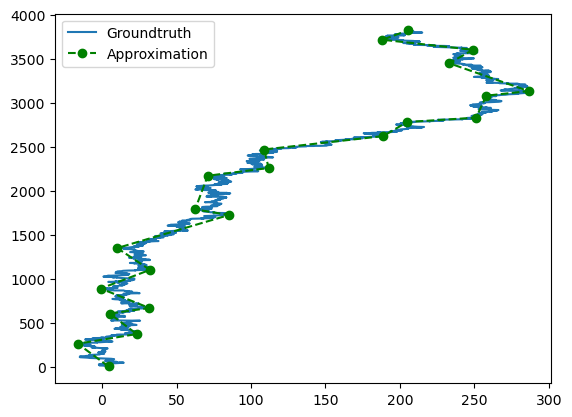

Requested: 10 Got: 10


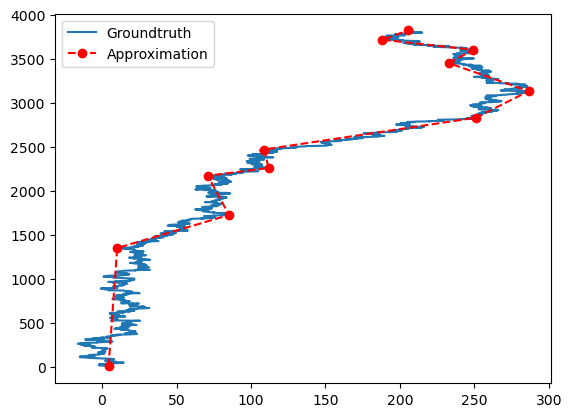

In [18]:
## Random walk
N = 2000

phi = np.random.uniform(0.0, np.pi, N)
s = np.random.uniform(1.0, 5.0, N)

x = np.cumsum(s * np.cos(phi))
y = np.cumsum(s * np.sin(phi))

G = np.array((x, y)).transpose()

## Min-num problem
# Set maximum allowable error
epsilon = 20.0

# Time execution of min_num method provided in this package
t_start = time.time()
G_pp = polyprox.min_num(G, epsilon)
t_exec_pp = time.time() - t_start

# Time execution of Hirschmann's implementation
t_start = time.time()
G_rdp = rdp.rdp(G, epsilon)
t_exec_rdp = time.time() - t_start

print("Same result as rdp: {}".format(np.array_equal(G_rdp, G_pp)))
print("Speedup: {:.2f}%".format((t_exec_rdp - t_exec_pp) / t_exec_rdp * 100.0))

plt.plot(G[:, 0], G[:, 1], label="Groundtruth")
plt.plot(G_pp[:, 0], G_pp[:, 1], "g--o", label="Approximation")
plt.legend()
plt.show()

## Min-e problem
# Number of points by which to approximate
m = 10
G_pp = polyprox.min_e(G, m)
t_exec_pp = time.time() - t_start

print("Requested: {} Got: {}".format(m, len(G_pp) - 2))

plt.plot(G[:, 0], G[:, 1], label="Groundtruth")
plt.plot(G_pp[:, 0], G_pp[:, 1], "r--o", label="Approximation")
plt.legend()
plt.show()